# Segmentación de Clientes para DesignReels

En el competitivo mundo del comercio electrónico, entender a fondo a nuestros clientes es fundamental para ofrecer experiencias personalizadas y maximizar la satisfacción y lealtad del cliente. Este análisis de segmentación de clientes tiene como objetivo explorar y comprender las distintas características y comportamientos de los clientes que interactúan con nuestra tienda en línea, especializada en productos creativos.

Utilizando técnicas avanzadas de análisis de datos, como clustering y segmentación, este estudio buscará identificar grupos homogéneos de clientes. Estos segmentos nos permitirán personalizar estrategias de marketing más efectivas, optimizar la selección de productos y mejorar la experiencia general de compra. Al comprender las necesidades y preferencias únicas de cada segmento, aspiramos a fortalecer la conexión emocional con la marca y aumentar la retención de clientes a largo plazo.

A lo largo de este análisis, exploraremos cómo diferentes segmentos de clientes interactúan con nuestros productos, qué atributos compartidos tienen y cómo podemos adaptar nuestras iniciativas de negocio para satisfacer mejor sus expectativas. Este enfoque estratégico no solo impulsará el crecimiento y la rentabilidad de DesignReels, sino que también nos permitirá destacar en un mercado saturado al ofrecer soluciones que verdaderamente resuenen con nuestros clientes.

Juntos, avanzaremos hacia una comprensión más profunda de nuestros clientes y hacia la creación de experiencias de compra personalizadas y significativas que fortalezcan la posición de DesignReels como líder en su categoría de productos creativos.


# Diccionario de datos

El conjunto de datos contiene información detallada sobre las transacciones de ventas de la tienda

Descripción de las Columnas

- invoice_no: Número de factura generado para cada transacción.
- stock_code: Código único que identifica cada producto vendido.
- description: Descripción del producto vendido.
- quantity: Cantidad de unidades vendidas de cada producto en la factura.
- invoice_date: Fecha y hora en que se emitió la factura.
- unit_price: Precio unitario del producto en la factura.
- customer_id: Identificación única del cliente que realizó la compra.
- region: Región o ubicación del cliente.
- total: Total de la venta, calculado como la cantidad vendida multiplicada por el precio unitario.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('/content/dataframe/Online_Retail.csv', encoding='iso-8859-1')

In [3]:
df.sample(10)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
71674,542192,22750,FELTCRAFT PRINCESS LOLA DOLL,2,26/01/2020 11:27,3.75,14049.0,United Kingdom
393108,570796,21169,YOU'RE CONFUSING ME METAL SIGN,2,12/10/2020 12:19,1.69,16241.0,United Kingdom
400940,571408,22972,CHILDREN'S SPACEBOY MUG,2,17/10/2020 12:22,1.65,15012.0,United Kingdom
286245,562024,21328,BALLOONS WRITING SET,1,01/08/2020 16:07,3.29,NaN,United Kingdom
150913,549525,22204,MILK PAN BLUE POLKADOT,1,08/04/2020 15:44,7.46,NaN,United Kingdom
313170,564439,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,2,25/08/2020 12:12,4.95,12841.0,United Kingdom
199614,554098,21704,BAG 250g SWIRLY MARBLES,3,22/05/2020 13:01,0.85,14769.0,United Kingdom
379627,569700,22361,GLASS JAR DAISY FRESH COTTON WOOL,2,05/10/2020 15:56,5.79,NaN,United Kingdom
323023,C565237,23245,SET OF 3 REGENCY CAKE TINS,-2,02/09/2020 09:47,4.95,14299.0,United Kingdom
52535,540798,22748,POPPY'S PLAYHOUSE KITCHEN,2,11/01/2020 12:11,2.10,17365.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#cambio del nombre de las columnas a minusculas
new_col_name = []

for old_name in df.columns:
    name_stripped = old_name.strip()
    # Luego, pon todas las letras en minúsculas
    name_lowered = name_stripped.lower()
    # Por último, reemplaza los espacios entre palabras por guiones bajos
    name_no_spaces = name_lowered.replace(' ', '_')
    # Agrega el nuevo nombre a la lista de nuevos nombres de columna
    new_col_name.append(name_no_spaces)

df.columns = new_col_name


In [6]:
#cambio de tipo de la columna invoce_date a datetime
df['invoice_date']=pd.to_datetime(df['invoice_date'], format="%d/%m/%Y %H:%M")

In [7]:
#se llenan los nan de la columna customer_id con 0
df['customer_id'] = df['customer_id'].fillna(0)

In [8]:
#cambio del tipo de la columna customer_id a entero
df['customer_id'] = df['customer_id'].astype(int)

In [9]:
df.sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
31836,539015,20685,DOORMAT RED RETROSPOT,5,2019-12-15 13:38:00,7.95,15822,United Kingdom
114085,546007,22698,PINK REGENCY TEACUP AND SAUCER,1,2020-03-08 15:34:00,5.79,0,United Kingdom
335597,566290,16237,SLEEPING CAT ERASERS,30,2020-09-11 15:24:00,0.21,14456,United Kingdom
512809,579516,21927,BLUE/CREAM STRIPE CUSHION COVER,2,2020-11-29 17:52:00,1.25,17841,United Kingdom
487619,577773,23241,TREASURE TIN GYMKHANA DESIGN,2,2020-11-21 15:57:00,2.08,16712,United Kingdom
143067,548664,21448,12 DAISY PEGS IN WOOD BOX,12,2020-04-01 14:45:00,1.65,14911,EIRE
59668,541371,22961,JAM MAKING SET PRINTED,6,2020-01-17 14:51:00,1.45,13983,United Kingdom
183845,552670,21430,SET/3 RED GINGHAM ROSE STORAGE BOX,1,2020-05-10 15:06:00,7.46,0,United Kingdom
355820,567972,85176,SEWING SUSAN 21 NEEDLE SET,12,2020-09-23 10:14:00,0.85,13949,United Kingdom
4501,536784,16237,SLEEPING CAT ERASERS,90,2019-12-02 15:20:00,0.16,15061,United Kingdom


In [10]:
df['region'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [11]:
#se remplaza el nombre de los paises agregaqdos como EIRE y RSA para unificar todos los nombres en ingles y mayusculas y minusculas
df['region']= df['region'].replace('EIRE', 'Ireland')

In [12]:
df['region']= df['region'].replace('RSA', 'Sudafrica')

In [13]:
df['region'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'Sudafrica'], dtype=object)

In [14]:
#verificacion de los valores menores a cero en la columan quantity. Aun falta determinar que tratamiento se le daran a estos datos
df[df['quantity'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
141,C536379,D,Discount,-1,2019-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2019-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2019-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2020-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2020-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2020-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2020-12-09 11:58:00,1.25,17315,United Kingdom


In [15]:
#verificacion de los valores menores a cero en la columan unit_price. Aun falta determinar que tratamiento se le daran a estos datos
df[df['unit_price'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
299983,A563186,B,Adjust bad debt,1,2020-08-12 14:51:00,-11062.06,0,United Kingdom
299984,A563187,B,Adjust bad debt,1,2020-08-12 14:52:00,-11062.06,0,United Kingdom


In [16]:
#creacion de una nueva columana que calcula el total vendido por factura
df['total'] = df['quantity'] * df['unit_price']

In [17]:
#se convierten las descripciones a minuscula para unificar el formato
df['description'] = df['description'].str.lower()

In [18]:
df.sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
81976,543182,72802A,rose scent candle in jewelled box,1,2020-02-04 10:40:00,8.29,0,United Kingdom,8.29
303189,563532,23296,set of 6 tea time baking cases,128,2020-08-17 11:04:00,1.04,17511,United Kingdom,133.12
241873,C558255,22699,roses regency teacup and saucer,-1,2020-06-27 17:06:00,2.95,12955,United Kingdom,-2.95
372743,569246,84380,set of 3 butterfly cookie cutters,2,2020-10-03 09:57:00,2.46,14096,United Kingdom,4.92
316211,564750,22846,bread bin diner style red,1,2020-08-30 09:36:00,16.95,17690,United Kingdom,16.95
35381,539436,22196,small heart measuring spoons,2,2019-12-17 14:49:00,1.66,0,United Kingdom,3.32
219785,556108,21090,set/6 collage paper plates,6,2020-06-08 17:59:00,0.83,0,United Kingdom,4.98
119740,546569,23008,dolly girl baby gift set,12,2020-03-15 10:53:00,14.95,14016,Ireland,179.40
165078,550767,23000,travel card wallet transport,24,2020-04-20 12:32:00,0.42,14776,United Kingdom,10.08
229351,557033,21212,pack of 72 retrospot cake cases,24,2020-06-16 13:48:00,0.55,13826,United Kingdom,13.20


In [19]:
#verificar que no existe ningun valor 0 en la columna quantity; sin embargo tener en cuenta que si existen aun menores a 0
df[df['quantity'] == 0]


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total


In [20]:
#se decide eliminar del dataframe los datos que en unit_price y en customer_id sean iguales a 0, dado que consideramos no aportan ningun informacion util para futuros analisis
ceros = df.query(('unit_price > 0 & customer_id >= 0'))
display(ceros)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
0,536365,85123A,white hanging heart t-light holder,6,2019-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2019-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2020-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,children's apron dolly girl,6,2020-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,childrens cutlery dolly girl,4,2020-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,childrens cutlery circus parade,4,2020-12-09 12:50:00,4.15,12680,France,16.60


In [21]:
#verificacion relacionado con los datos eliminados
ceros['description'].unique()

array(['white hanging heart t-light holder', 'white metal lantern',
       'cream cupid hearts coat hanger', ..., 'letter "u" bling key ring',
       'cream hanging heart t-light holder', 'paper craft  little birdie'],
      dtype=object)

In [22]:
#verificacion relacionado con los datos eliminados
ceros['region'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'Sudafrica'], dtype=object)

In [23]:
#verificacion relacionado con los datos eliminados
ceros['invoice_date'].dt.year.unique()


array([2019, 2020], dtype=int32)

In [24]:
#verificacion relacionado con los datos eliminados
ceros['invoice_date'].dt.month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [25]:
#se filta el data frame despues de las verificaciones anteriores para conservar unicamente los datos que sean diferentes a 0

df = df.query('unit_price > 0.0')

df = df.query('customer_id > 0')

df = df.query('quantity > 0')

In [26]:
#Se observan los valores maximos de la columna unit price y nos damos cuenta que hay facturas que no son productos como tal, cuyos monton son muy altos dado que el valor por unidad es elevado tambien
#al parecer estas facturas corresponden a gastos de envio y/0 gastos varios que podrian afectar nuestra analisis de clientes, dado que nos interesa unicamente sus compras se eliminan del dataset
df[df['unit_price']>= 450]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
117054,546328,M,manual,1,2020-03-11 10:19:00,1687.17,14911,Ireland,1687.17
117055,546329,M,manual,1,2020-03-11 10:22:00,1687.17,14911,Ireland,1687.17
144826,548813,M,manual,1,2020-04-04 13:03:00,2382.92,12744,Singapore,2382.92
144828,548813,M,manual,1,2020-04-04 13:03:00,1252.95,12744,Singapore,1252.95
144829,548820,M,manual,1,2020-04-04 13:04:00,2053.07,12744,Singapore,2053.07
145831,548913,M,manual,1,2020-04-05 09:45:00,1136.30,12669,France,1136.30
150615,549468,M,manual,1,2020-04-08 14:27:00,1867.86,17940,United Kingdom,1867.86
173382,551697,POST,postage,1,2020-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75
187584,552980,POST,postage,1,2020-05-12 14:52:00,523.00,12590,Germany,523.00
188277,553018,M,manual,1,2020-05-12 19:02:00,557.72,12757,Portugal,557.72


In [27]:
df = df.query("stock_code != 'M'")
df = df.query("stock_code != 'DOT'")
df = df.query("stock_code != 'POST'")

In [28]:
df[df['unit_price']>= 450]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
222680,556444,22502,picnic basket wicker 60 pieces,60,2020-06-10 15:28:00,649.5,15098,United Kingdom,38970.0
222682,556446,22502,picnic basket wicker 60 pieces,1,2020-06-10 15:33:00,649.5,15098,United Kingdom,649.5


In [29]:
df[df['unit_price'] == 0.0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total


In [30]:
df[df['quantity'] == 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total


In [31]:
df.describe()

,quantity,invoice_date,unit_price,customer_id,total
count,396485.000000,396485,396485.000000,396485.000000,396485.000000
mean,13.008066,2020-07-10 20:02:19.138226944,2.884385,15301.436912,22.114122
min,1.000000,2019-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2020-04-07 11:16:00,1.250000,13975.000000,4.680000
50%,6.000000,2020-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2020-10-20 14:40:00,3.750000,16801.000000,19.800000
max,80995.000000,2020-12-09 12:50:00,649.500000,18287.000000,168469.600000
std,179.607863,NaN,4.354867,1709.758505,308.841950


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396485 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    396485 non-null  object        
 1   stock_code    396485 non-null  object        
 2   description   396485 non-null  object        
 3   quantity      396485 non-null  int64         
 4   invoice_date  396485 non-null  datetime64[ns]
 5   unit_price    396485 non-null  float64       
 6   customer_id   396485 non-null  int64         
 7   region        396485 non-null  object        
 8   total         396485 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.2+ MB


In [33]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
0,536365,85123A,white hanging heart t-light holder,6,2019-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2019-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [35]:
# Agrupar datos por ID de cliente
grouped_df = df.groupby('customer_id')

# Calcula la primera y última fecha de compra de cada cliente
first_purchase_date = grouped_df['invoice_date'].min()
last_purchase_date = grouped_df['invoice_date'].max()

# Calcular la diferencia horaria entre la primera y la última compra (en días)

time_delta = last_purchase_date - first_purchase_date
time_in_days = time_delta.dt.days


# Combinar los resultados en el DataFrame
customer_purchase_time = pd.DataFrame({'time_in_days': time_in_days}).reset_index()

# Mostrar el tiempo de compra del cliente
customer_purchase_time['time_in_days']= customer_purchase_time['time_in_days'].replace(0, 1)
customer_purchase_time

,customer_id,time_in_days
0,12346,1
1,12347,366
2,12348,283
3,12349,1
4,12350,1
...,...,...
4330,18280,1
4331,18281,1
4332,18282,118
4333,18283,334


In [37]:
#Creamos un Histograma para visualizar la distribucios del tiempo de vida del cliente en nuestra tienda
import plotly.graph_objects as go
fig = px.histogram(customer_purchase_time, x="time_in_days", nbins=10, text_auto=True, title= 'Distribución del Tiempo de Vida del Cliente en nuestra tienda')
fig.update_layout(xaxis_title='Dias', yaxis_title='Cantidad de Clientes')

fig.show()

# Observacion:

El la visualizacion nos damos cuenta que hay una gran cantidad de nuestros clientes entre el rango de los 0 a los 50 dias, por lo que pueden ser clientes recientes comprando en nuestra tiendo lo cual es bueno, o tambien pueden ser clientes que ya dejaron de comprar y debemoos buscar la forma de retomarlos.

In [38]:
def add_date_components(group):
  """
  Extracts day, month, and year from the 'invoice_date' column within a group.

  Args:
    group: A Pandas group object (subset of the DataFrame).

  Returns:
    The group with added columns 'days', 'months', and 'years'.
  """
  group['days'] = group['invoice_date'].dt.day
  group['months'] = group['invoice_date'].dt.month
  group['years'] = group['invoice_date'].dt.year
  return group

df_with_components = df.groupby('invoice_date').apply(add_date_components)

In [39]:
df_with_components.head()

invoice_no stock_code  \
invoice_date                                  
2019-12-01 08:26:00 0     536365     85123A   
                    1     536365      71053   
                    2     536365     84406B   
                    3     536365     84029G   
                    4     536365     84029E   

                                               description  quantity  \
invoice_date                                                           
2019-12-01 08:26:00 0   white hanging heart t-light holder         6   
                    1                  white metal lantern         6   
                    2       cream cupid hearts coat hanger         8   
                    3  knitted union flag hot water bottle         6   
                    4       red woolly hottie white heart.         6   

                             invoice_date  unit_price  customer_id  \
invoice_date                                                         
2019-12-01 08:26:00 0 2019-12-01 08:26:00        2.55        17850   
                    1 2019-12-01 08:26:00        3.39        17850   
                    2 2019-12-01 08:26:00        2.75        17850   
                    3 2019-12-01 08:26:00        3.39        17850   
                    4 2019-12-01 08:26:00        3.39        17850   

                               region  total  days  months  years  
invoice_date                                                       
2019-12-01 08:26:00 0  United Kingdom  15.30     1      12   2019  
                    1  United Kingdom  20.34     1      12   2019  
                    2  United Kingdom  22.00     1      12   2019  
                    3  United Kingdom  20.34     1      12   2019  
                    4  United Kingdom  20.34     1      12   2019

In [94]:
#Filtramos los datos para encontrar el top 10 de las regiones con mayores ventas
filtered= df_with_components.groupby('region')['total'].sum().reset_index().sort_values(by='total', ascending=False).head(10)
top_10_region= df_with_components['region'].tolist()
filtered_df = df_with_components[df_with_components['region'].isin(top_10_region)]
filtered_df_new= filtered_df.groupby(['region', 'days', 'months', 'years'])['total'].sum().reset_index().sort_values(by='total', ascending=False)
filtered_df_new


,region,days,months,years,total
1285,United Kingdom,9,12,2020,179562.78
1395,United Kingdom,20,9,2020,100457.88
1369,United Kingdom,18,1,2020,84035.94
1345,United Kingdom,15,9,2020,65843.34
1283,United Kingdom,9,11,2020,58843.67
...,...,...,...,...,...
532,Germany,13,12,2019,12.45
907,Netherlands,20,7,2020,11.02
1115,Sweden,11,5,2020,8.50
1162,Switzerland,21,9,2020,4.95


In [92]:
#Creamos una visualizacion para ver la distribucion de ventas.
fig = px.scatter(filtered_df_new, x="months", y="total", color="region",
                 size='days', hover_data=['years'],
                 title='Distribucion de Ventas por dia/mes/año y region')

fig.update_layout(xaxis_title='Meses', yaxis_title='Ingresos por ventas')
fig.show()


In [41]:
#Filtramos los datos para calcular los el tiempo de vida de un cliente comprando en nuestra tienda.
customer_days= df_with_components.groupby(['customer_id', 'months', 'years'])
max_days= customer_days['invoice_date'].max()
min_days= customer_days['invoice_date'].min()
total= max_days - min_days
total= total.dt.days.reset_index()
total['invoice_date']= total['invoice_date'].replace(0, 1)
total.sort_values(by='invoice_date')

,customer_id,months,years,invoice_date
0,12346,1,2020,1
7759,15835,10,2020,1
7760,15836,10,2020,1
7761,15837,10,2020,1
7762,15838,2,2020,1
...,...,...,...,...
9927,16839,7,2020,29
901,12709,3,2020,29
5824,14911,7,2020,30
4074,14156,7,2020,30


In [42]:
#Agregamos una nueva colunma incorparando en ella valores 1 para casos de estudios a futuro de las faturaciones.
total['buy_month'] = 1
total

,customer_id,months,years,invoice_date,buy_month
0,12346,1,2020,1,1
1,12347,1,2020,1,1
2,12347,4,2020,1,1
3,12347,6,2020,1,1
4,12347,8,2020,1,1
...,...,...,...,...,...
13024,18283,10,2020,1,1
13025,18283,11,2020,19,1
13026,18283,12,2020,1,1
13027,18287,5,2020,1,1


In [100]:
# Filtramos los datos por años para luego generar el histograma
group_1= total[total['years']== 2019]
group_2= total[total['years']== 2020]

fig = go.Figure()
fig.add_trace(go.Histogram(x=group_1['months'], name= '2019', texttemplate="%{y}", marker_line_color='black', marker_line_width=1))
fig.add_trace(go.Histogram(x=group_2['months'], name= '2020', texttemplate="%{y}", marker_line_color='black', marker_line_width=1))
fig.update_layout(
    title_text='Cantidad de compras mensuales/año', # title of plot
    xaxis_title_text='Meses', # xaxis label
    yaxis_title_text='Cantidad de Clientes',) # yaxis label
fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.75)
fig.show()

# Observaciones:

Podemos observar en el grafico que tenemos registro del año 2019 solo del mes 12.

Tambien es importante observar que el numero de facturaciones mensuales durante los meses 9, 10 y 11 aumentan significativamente, dando a entender que son los mejores meses de ventas.

El mes de diciembre habria que se puede mejorar ya que baja significativamente la cantidad de ventas en dicho mes

In [179]:
# Agrupamos por Nº de factura y calcular el valor medio por transacción
average_value_per_transaction = df.groupby('invoice_no')['total'].mean().reset_index()

# Cambie el nombre de las columnas para mayor claridad
average_value_per_transaction.columns = ['invoice_no', 'average_value']

# Mostrar las primeras filas del resultado
average_value_per_transaction


,invoice_no,average_value
0,536365,19.874286
1,536366,11.100000
2,536367,23.227500
3,536368,17.512500
4,536369,17.850000
...,...,...
18411,581583,62.300000
18412,581584,70.320000
18413,581585,15.669048
18414,581586,84.800000


In [102]:
# Calcular el tiempo entre cada transacción para cada cliente
df['time_diff']= df.groupby('customer_id')['invoice_date'].diff().dt.days

# Calcular la media del tiempo entre transacciones para cada cliente
avg_time_between_purchases = df.groupby('customer_id')['time_diff'].mean().reset_index()
avg_time_between_purchases.columns = ['customer_id', 'avg_days_between_purchases']

# Graficar los resultados de manera interactiva con Plotly Express
fig = px.histogram(avg_time_between_purchases, x='avg_days_between_purchases', nbins=20, title='Distribución del tiempo promedio entre compras')
fig.update_layout(xaxis_title='Días promedio entre compras', yaxis_title='Número de Clientes')
fig.show()

# Observacion:

Podemos observar en la grafica que la gran mayoria de los clientes vuelven a comprar en un lapso no mayor a 10 dias.


In [104]:
# Definimos umbrales para segmentar a los clientes
threshold_frequent = 10  # Por ejemplo, clientes que compran cada 15 días o menos
threshold_occasional = 70 # Por ejemplo, clientes que compran entre 15 y 30 días

# Creamos una nueva columna para la segmentación
avg_time_between_purchases['segment'] = 'Ocasional'
avg_time_between_purchases.loc[avg_time_between_purchases['avg_days_between_purchases'] <= threshold_frequent, 'segment'] = 'Frecuente'
avg_time_between_purchases.loc[(avg_time_between_purchases['avg_days_between_purchases'] > threshold_frequent) & (avg_time_between_purchases['avg_days_between_purchases'] <= threshold_occasional), 'segment'] = 'Medio'

# Analizamos las características de cada grupo
print(avg_time_between_purchases.groupby('segment')['avg_days_between_purchases'].describe())

            count        mean        std        min        25%         50%  \
segment                                                                      
Frecuente  4008.0    1.677613   2.146939   0.000000   0.000000    0.918110   
Medio       237.0   20.512257  12.054443  10.111111  12.352941   16.136364   
Ocasional    17.0  130.975490  62.840322  74.000000  97.000000  115.000000   

                  75%         max  
segment                            
Frecuente    2.496681   10.000000  
Medio       23.333333   69.666667  
Ocasional  127.500000  310.000000  


# Observaciones:

1. Mayoria de clientes frecuentes:

El hecho de que la mayoria de nuestros clientes (4008) pertenezcan al segmento 'Frecuente' con un promedio de 1.67 dias entre compras, indica que tenemos una base solida de clientes leales que compran con regularidad

2. Oportunidad de crecimiento en el segmento 'Medio':

El segmento 'Medio' (237 clientes) presenta un promedio de 20.5 dias entre compras. Esto sugiere que existe una oportunidad de convertir a estos clientes en compradores mas frecuentes. podriamos explorar estrategias de marketing personalizadas, como descuentas exclusivos, programas de fidelizacion o recomendaciones de productos basados en sus compras.

3. Atencion al segmento 'Ocasional':

El segmento 'Ocasional' (17 clientes) muestra un promedio de 130 dias entre compras y una alta desviacion estandar. Podriamos investigar las razones detras de esta baja frecuencia para reactivarlos, como enviarles recordatorios, ofertas especiales ocontenido relevante a sus intereses.

Recomendaciones:

- Fortalecer la relación con los clientes frecuentes:


Continúa brindando un excelente servicio al cliente, ofreciendo productos de calidad y desarrollando programas de fidelización para mantener a estos clientes satisfechos y leales.


- Incentivar la compra frecuente en el segmento "Medio":


Implementa estrategias de marketing personalizadas para motivar a estos clientes a comprar con mayor frecuencia, como descuentos por volumen, envío gratuito o acceso anticipado a nuevos productos.


- Reactivar a los clientes "Ocasionales":


Identifica las razones detrás de su baja frecuencia de compra y desarrolla estrategias para reengancharlos, como campañas de email marketing, ofertas personalizadas o contenido relevante a sus intereses.


- Analizar más a fondo los datos:


Investiga otros factores que pueden influir en la frecuencia de compra, como el tipo de producto, el canal de venta, la ubicación geográfica, etc. Esto te permitirá personalizar aún más tus estrategias de marketing y mejorar la retención de clientes.

In [168]:
# Agrupamos los datos por factura y totales para sacar la media de compras
invoice_totals = df.groupby('invoice_no')['total'].sum().reset_index()
average_purchase_value = invoice_totals['total'].mean()


print(invoice_totals)
print()
print('El valor promedio por compra de cada cliente es:', average_purchase_value)

      invoice_no   total
0         536365  139.12
1         536366   22.20
2         536367  278.73
3         536368   70.05
4         536369   17.85
...          ...     ...
18411     581583  124.60
18412     581584  140.64
18413     581585  329.05
18414     581586  339.20
18415     581587  249.45

[18416 rows x 2 columns]

El valor promedio por compra de cada cliente es: 476.1032609687228


In [152]:
# Agrupar por fecha y calcular el valor medio por transacción
average_value_per_day = df_with_components.groupby(df_with_components['invoice_date'])['total'].mean().reset_index()

# Cambie el nombre de las columnas para mayor claridad
average_value_per_day.columns = ['date', 'average_value']

# Mostrar las primeras filas del resultado
print(average_value_per_day.head())

fig = go.Figure()
fig.add_trace(go.Scatter(x=average_value_per_day['date'], y=average_value_per_day['average_value'],
                    mode='lines+markers',
                    name='lines+markers',
                    ))
fig.update_layout(xaxis_title='Fecha', yaxis_title='Valor Promedio por Compra', title='Evolución del Valor Promedio por Compra a lo Largo del Tiempo')
fig.show()

                 date  average_value
0 2019-12-01 08:26:00      19.874286
1 2019-12-01 08:28:00      11.100000
2 2019-12-01 08:34:00      21.798750
3 2019-12-01 08:35:00      17.850000
4 2019-12-01 08:45:00      42.203158


# Observacion:

Podemos observar en el grafico anterior 2 anomalias de compras, las cuales al verificar la primera es un cliente que ha realizado ya varias compras con nosotros y el otro es un cliente que sus primeras 2 compras fueron pequeñas pero luego el 9 de diciembre de 2020 realiza una compra grande de (80995) paper craft little birdie. el cual da un total de 168469.60

El resto de los datos se mantiene dentro de los rangos normales.

In [150]:
# Agrupe por fecha y calcular el valor medio por transacción
average_value_per_day = df_with_components.groupby(df_with_components['invoice_date'])['total'].mean().reset_index().sort_values(by='total', ascending=False)

# Cambie el nombre de las columnas para mayor claridad
average_value_per_day.columns = ['date', 'average_value']

# Elimine las filas con índices '17149' y '1775' las cuales pertenecena los 2 datos atipicos
average_value_per_day_filtered = average_value_per_day.iloc[2:]

# Mostrar las primeras filas del resultado
print(average_value_per_day_filtered.head())

fig = go.Figure()
fig.add_trace(go.Scatter(x=average_value_per_day_filtered['date'], y=average_value_per_day_filtered['average_value'],
                    mode='lines+markers',
                    name='lines+markers',
                    ))
fig.update_layout(xaxis_title='Fecha', yaxis_title='Valor Promedio por Compra', title='Evolución del Valor Promedio por Compra a lo Largo del Tiempo')
fig.show()

                     date  average_value
13796 2020-10-27 12:11:00    4992.000000
7430  2020-06-10 15:28:00    4391.711111
5156  2020-04-18 13:20:00    4307.180000
1572  2020-01-11 12:57:00    3918.750000
16989 2020-12-07 12:20:00    3861.000000


# Observaciones:

En este caso obviamos los 2 valores que tuvimos en el grafico anterios para en este caso poder ver mas de cerca la Evolucion del promedio de compra, en el cual podemos observar que en su gran mayoria esta por debajo de los 1000, pero tambien podemos notar una cantidad importante de clientes por encima de los 1000.

Se pueden aplicar estrategias como las mencionadas anteriormente para lograr que los clientes que estan por debajo de los 1000 evolucionen sus compras por encima de los 1000 o por lo menos lo mas cerca posible.

      customer_id  average_value
0           12346       77183.60
3007        16446       56157.50
2011        15098       13305.50
2502        15749        4453.43
2087        15195        3861.00


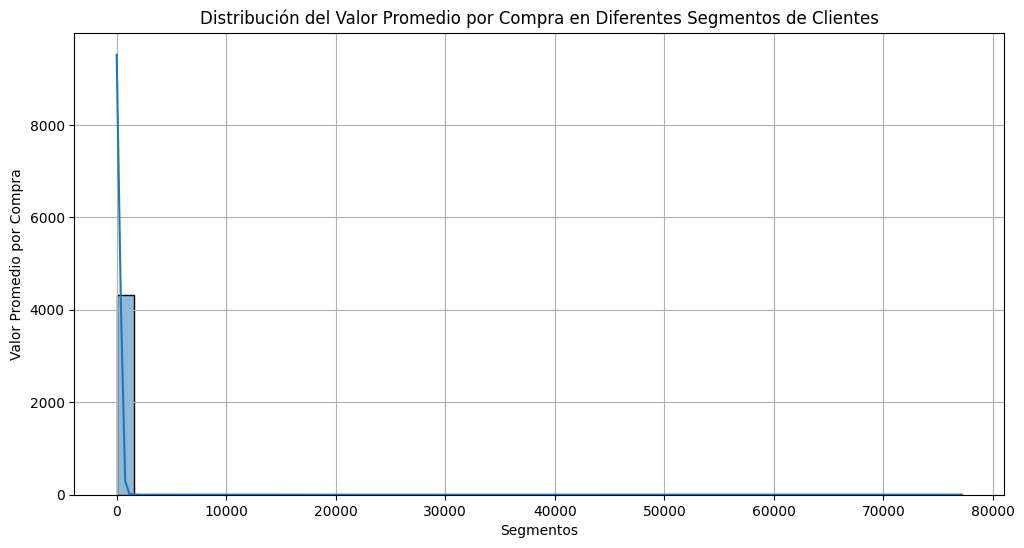

In [154]:
# Agrupe por cliente y calcule el valor medio por transacción
average_value_per_customer = df_with_components.groupby('customer_id')['total'].mean().reset_index().sort_values(by='total', ascending=False)

# Cambie el nombre de las columnas para mayor claridad
average_value_per_customer.columns = ['customer_id', 'average_value']

# Mostramos las primeras filas del resultado
print(average_value_per_customer.head())

# Trazamos la distribución del valor promedio por transacción para diferentes segmentos de clientes
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(average_value_per_customer['average_value'], bins=50, kde=True)
plt.title('Distribución del Valor Promedio por Compra en Diferentes Segmentos de Clientes')
plt.xlabel('Segmentos')
plt.ylabel('Valor Promedio por Compra')
plt.grid(True)
plt.show()

# Observacion:

- Los clientes con un valor promedio por compra de entre 2.000 y 4.000 representan la mayor parte de la base de clientes. Esto sugiere que estas son las categorías de clientes más importantes para la empresa.


- Los clientes con un valor promedio por compra superior a 4.000 representan una pequeña parte de la base de clientes, pero generan una gran cantidad de ingresos. Esto sugiere que estos clientes son muy valiosos para la empresa.

- Los clientes con un valor promedio por compra inferior a 2.000 representan una parte significativa de la base de clientes, pero generan una pequeña cantidad de ingresos. Esto sugiere que estos clientes pueden no ser tan valiosos para la empresa.

In [50]:
# Identificar los principales segmentos de clientes con el mayor valor promedio por transacción
# Ordenamos el marco de datos por AVERAGE_VALUE en orden descendente
sorted_average_value_per_customer = average_value_per_customer.sort_values(by='average_value', ascending=False)

# Mostrar los 10 principales clientes con el valor promedio más alto por transacción
round(sorted_average_value_per_customer.head(10), ndigits=2)

,customer_id,average_value
0,12346,77183.60
3007,16446,56157.50
2011,15098,13305.50
2502,15749,4453.43
2087,15195,3861.00
4188,18087,3202.92
597,13135,3096.00
3070,16532,1687.20
2677,16000,1377.08
3228,16754,1001.20


In [161]:
ccc# Identificamos los principales segmentos de clientes con el valor promedio más bajo por transacción
# Ordenamos el marco de datos por AVERAGE_VALUE en orden descendente
sorted_average_value_per_customer = average_value_per_customer.sort_values(by='average_value', ascending=False)

# Mostramos los 10 principales clientes con el valor promedio más bajo por transacción
round(sorted_average_value_per_customer.tail(10), ndigits=2)

,customer_id,average_value
4104,17967,2.56
4002,17832,2.55
1982,15060,2.52
881,13521,2.51
2577,15850,2.46
3588,17254,2.43
697,13271,2.26
990,13684,2.24
3993,17816,2.15
2315,15503,2.10


# Conclusion:

Luego de nuestros analisis en los datos logramos notar varias cosas:

 - existe una gran cantidad de nuestros clientes entre el rango de los 0 a los 50 dias, por lo que pueden ser clientes recientes comprando en nuestra tiendo lo cual es bueno, o tambien pueden ser clientes que ya dejaron de comprar y debemoos buscar la forma de retomarlos.

- Pudemos que tenemos registro del año 2019 solo del mes 12.

 Tambien es importante comentar que el numero de facturaciones mensuales durante los meses 9, 10 y 11 aumentan significativamente, dando a entender que son los mejores meses de ventas.

 El mes de diciembre habria que se puede mejorar ya que baja significativamente la cantidad de ventas en dicho mes.

 - Podemos observar en el grafico que tenemos registro del año 2019 solo del mes 12.

Tambien es importante observar que el numero de facturaciones mensuales durante los meses 9, 10 y 11 aumentan significativamente, dando a entender que son los mejores meses de ventas.

- El mes de diciembre habria que se puede mejorar ya que baja significativamente la cantidad de ventas en dicho mes.

- Mayoria de clientes frecuentes:
El hecho de que la mayoria de nuestros clientes (4008) pertenezcan al segmento 'Frecuente' con un promedio de 1.67 dias entre compras, indica que tenemos una base solida de clientes leales que compran con regularidad

- Oportunidad de crecimiento en el segmento 'Medio':
El segmento 'Medio' (237 clientes) presenta un promedio de 20.5 dias entre compras. Esto sugiere que existe una oportunidad de convertir a estos clientes en compradores mas frecuentes. podriamos explorar estrategias de marketing personalizadas, como descuentas exclusivos, programas de fidelizacion o recomendaciones de productos basados en sus compras.

- Atencion al segmento 'Ocasional':
El segmento 'Ocasional' (17 clientes) muestra un promedio de 130 dias entre compras y una alta desviacion estandar. Podriamos investigar las razones detras de esta baja frecuencia para reactivarlos, como enviarles recordatorios, ofertas especiales ocontenido relevante a sus intereses.

## Recomendaciones:

- Fortalecer la relación con los clientes frecuentes:
Continúa brindando un excelente servicio al cliente, ofreciendo productos de calidad y desarrollando programas de fidelización para mantener a estos clientes satisfechos y leales.

- Incentivar la compra frecuente en el segmento "Medio":
Implementa estrategias de marketing personalizadas para motivar a estos clientes a comprar con mayor frecuencia, como descuentos por volumen, envío gratuito o acceso anticipado a nuevos productos.

- Reactivar a los clientes "Ocasionales":
Identifica las razones detrás de su baja frecuencia de compra y desarrolla estrategias para reengancharlos, como campañas de email marketing, ofertas personalizadas o contenido relevante a sus intereses.

- Analizar más a fondo los datos:
Investiga otros factores que pueden influir en la frecuencia de compra, como el tipo de producto, el canal de venta, la ubicación geográfica, etc. Esto te permitirá personalizar aún más tus estrategias de marketing y mejorar la retención de clientes.

- El valor promedio por compra de cada cliente es: 476.10

- Observamos en uno de los graficos
 anteriores 2 anomalias de compras, las cuales al verificar la primera es un cliente que ha realizado ya varias compras con nosotros y el otro es un cliente que sus primeras 2 compras fueron pequeñas pero luego el 9 de diciembre de 2020 realiza una compra grande de (80995) paper craft little birdie. el cual da un total de 168469.60

 El resto de los datos se mantiene dentro de los rangos normales.

 - En otra de las graficas obviamos los 2 valores que tuvimos en el grafico anterios y asi en este caso poder ver mas de cerca la Evolucion del promedio de compra de la mayoria de los clientes, en el cual pudimos observar que en su gran mayoria esta por debajo de los 1000, pero tambien podemos notar una cantidad importante de clientes por encima de los 1000.

 Se pueden aplicar estrategias como las mencionadas anteriormente para lograr que los clientes que estan por debajo de los 1000 evolucionen sus compras por encima de los 1000 o por lo menos lo mas cerca posible.

 - Los clientes con un valor promedio por compra de entre 2.000 y 4.000 representan la mayor parte de la base de clientes. Esto sugiere que estas son las categorías de clientes más importantes para la empresa.


- Los clientes con un valor promedio por compra superior a 4.000 representan una pequeña parte de la base de clientes, pero generan una gran cantidad de ingresos. Esto sugiere que estos clientes son muy valiosos para la empresa.

- Los clientes con un valor promedio por compra inferior a 2.000 representan una parte significativa de la base de clientes, pero generan una pequeña cantidad de ingresos. Esto sugiere que estos clientes pueden no ser tan valiosos para la empresa.